## Hybrid Calculations Selection Study
#### April Novak

This notebook serves as an investigation of the impact of choosing various hybrid parameters based on the hybrid.inp VERA input. For comparison, all of the runs use the same seed.

To quickly investigate the contents of the HDF5 output files, use `h5dump` from the command line:

`h5dump hybrid_1.out.h5`

In order to see just the general heirarchy of the HDF5 file, use the `-n` option. Then, this will show all of the groups and datasets. To see the actual contents of just a portion of the HDF5 file, use the `-d` option, with the path to the group or dataset that you would like to view.

`h5dump -d /tally/flux/multiplier_names hybrid_1.out.h5`

In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

# path to Exnihilo-specific python modules on your machine. This is a path
# on a personal machine due to the mounting to orthanc.
sys.path.insert(0, '/Users/aprilnovak/Installs/python')
sys.path.append('/Users/aprilnovak/anaconda3/lib/python3.5/')

import exnihilotools.matplotlib as extools

extools.screen_style()
%matplotlib inline

In [2]:
# for plotting tallies
from omnibus.data import plot
from omnibus.formats.output import load

## Case 1: fixed-source (no hybrid acceleration)
This calculation uses no acceleration method, and 10,000 neutrons.

In [3]:
output = load("hybrid/hybrid_1.out.h5").extract();
tallies = output['tally']
mesh_tally = tallies.mesh_tally.total
flux_tally = tallies.flux.total

Loading HDF5 file...
Loading Omnibus output from HDF5 data at hybrid/hybrid_1.out.h5
INFO: Loaded 'Simple hybrid problem': Omnibus output calculated on 2017JAN13 10:58
INFO: Data generated with Exnihilo version 6.2 (r29324: #3f9d5b56 on 2017JAN03) [debug] [DBC=7], Scale version 6.3 (r22294: #b59c8735 on 2017JAN03) [debug] [DBC=7]
            ...finished loading HDF5 file in 52.0 seconds
/Users/aprilnovak/Installs/python/omnibus/data/dataset.py:146: RuntimeWarning: Extracting compound dataset manually because this version of h5py does not properly support aligned data types
  "data types", RuntimeWarning)


In [4]:
#plot(mesh_tally.xs(z=0.9, stat='mean', multiplier='fission'));

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x10b11b6a0>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x10bb6a6a0>,
 'fig': <matplotlib.figure.Figure at 0x11136e4e0>,
 'plot': <matplotlib.collections.QuadMesh at 0x10bb11b70>}

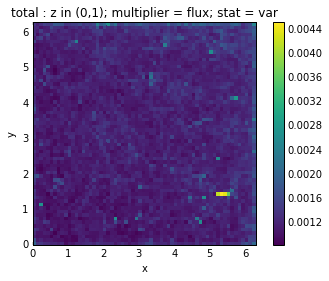

In [5]:
plot(flux_tally.xs(z=0.9, stat='var', multiplier='flux'))

## Case 2: FW-CADIS
This calculation uses FW-CADIS, 10,000 neutrons, and the following [DENOVO] block:

`[PHYSICS=smg mg]
mg_lib "test-8grp"
disable_upscattering True
pn_order 1`

In [6]:
output = load("hybrid/hybrid_2.out.h5").extract();
tallies = output['tally']
mesh_tally = tallies.mesh_tally.total
flux_tally = tallies.flux.total

Loading HDF5 file...
Loading Omnibus output from HDF5 data at hybrid/hybrid_2.out.h5
INFO: Loaded 'Simple hybrid problem': Omnibus output calculated on 2017JAN13 11:01
INFO: Data generated with Exnihilo version 6.2 (r29324: #3f9d5b56 on 2017JAN03) [debug] [DBC=7], Scale version 6.3 (r22294: #b59c8735 on 2017JAN03) [debug] [DBC=7]
            ...finished loading HDF5 file in 106.0 seconds
/Users/aprilnovak/Installs/python/omnibus/data/dataset.py:146: RuntimeWarning: Extracting compound dataset manually because this version of h5py does not properly support aligned data types
  "data types", RuntimeWarning)


In [7]:
#plot(mesh_tally.xs(z=0.9, stat='mean', multiplier='fission'));

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x10b1317f0>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x11178b358>,
 'fig': <matplotlib.figure.Figure at 0x10b105eb8>,
 'plot': <matplotlib.collections.QuadMesh at 0x111a41e48>}

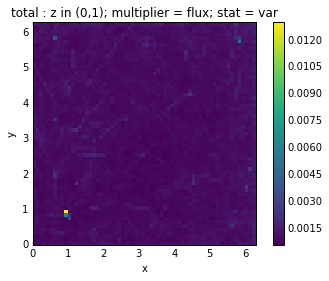

In [8]:
plot(flux_tally.xs(z=0.9, stat='var', multiplier='flux'))

## Case 3: CADIS
This calculation uses CADIS, 10,000 neutrons, and the following [DENOVO] block:

`[PHYSICS=smg mg]
mg_lib "test-8grp"
disable_upscattering True
pn_order 1`

In [9]:
output = load("hybrid/hybrid_3.out.h5").extract();
tallies = output['tally']
mesh_tally = tallies.mesh_tally.total
flux_tally = tallies.flux.total

Loading HDF5 file...
Loading Omnibus output from HDF5 data at hybrid/hybrid_3.out.h5
INFO: Loaded 'Simple hybrid problem': Omnibus output calculated on 2017JAN16 17:38
INFO: Data generated with Exnihilo version 6.2 (r29324: #3f9d5b56 on 2017JAN03) [debug] [DBC=7], Scale version 6.3 (r22294: #b59c8735 on 2017JAN03) [debug] [DBC=7]
            ...finished loading HDF5 file in 53.9 seconds
/Users/aprilnovak/Installs/python/omnibus/data/dataset.py:146: RuntimeWarning: Extracting compound dataset manually because this version of h5py does not properly support aligned data types
  "data types", RuntimeWarning)


{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x111a06a20>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x11178f860>,
 'fig': <matplotlib.figure.Figure at 0x111957b38>,
 'plot': <matplotlib.collections.QuadMesh at 0x111a7eb38>}

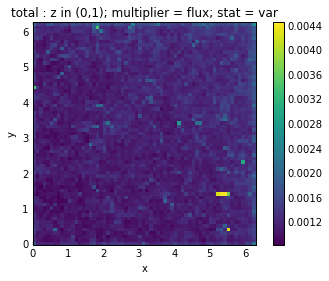

In [10]:
plot(flux_tally.xs(z=0.9, stat='var', multiplier='flux'))